<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 3 - Redes Recurrentes y Autoencoders </H3>
<hr style="height:2px;border:none"/>

### Pregunta 2. Autoencoders (AEs) en MNIST.

Integrantes:

- Christian Da Rocha, ROL: 2018.90.251-9
- Rodrigo Hermosilla, ROL: 95.74.144-4

##### Carga inicial de librerias
> En la siguiente sección y de manera previa se cargan todas las librerías necesarias para el ejercicio. Para efectos de mantener cierto orden con el código de las preguntas del ejercicio, se determinó que todas las cargas se realizarán previamente, no obstante, se entiende que esto podría generar alguna ineficiencia en el consumo de recursos, pero que suponemos es marginal.

In [2]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.models import load_model
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from keras.layers import *
from numpy.random  import binomial
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import mnist


Using TensorFlow backend.


> Descarga y asignación de variables estructuras globales

##### Pregunta a (previa).

<div class="alert alert-block alert-success">
    <b>Nota: </b>Para efectos de mejorar la modularización, el ejercicio construye una serie de funciones, permitiendo además su reutilización en distintos instantes.
</div>

In [3]:
def plot_digit(X, idx):
    img = X[idx]
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    #plt.title('true label: %d' % y[idx])
    plt.show()


In [4]:
def load_data():
    global X_train, y_train, X_val, y_val, X_test, y_test
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.#and x_test
    x_test = x_test.astype('float32') / 255.
    X_train = x_train.reshape(len(x_train),28*28)
    X_test = x_test.reshape(len(x_test),28*28)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(5000/60000), random_state=42)


In [5]:
load_data()
print("Largo de set de entrenamiento: "+str(len(X_train)))
print("Largo de set de validación: "+str(len(X_val)))
print("Largo de set de testing: "+str(len(X_test)))

Largo de set de entrenamiento: 55000
Largo de set de validación: 5000
Largo de set de testing: 10000


### 2.1 Reducción de dimensionalidad.

##### Pregunta 2.1.a.

In [5]:
def autoencoder_21a(name, d, verbose=True):
    print('Autoencoder con '+str(d)+' dimensiones')
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(X_train,X_train,verbose=verbose,epochs=50,batch_size=32,validation_data=(X_val,X_val))
    autoencoder.save('models/autoencoder_'+name+'.h5', overwrite=True)
    encoder.save('models/encoder_'+name+'.h5', overwrite=True)
    decoder.save('models/decoder_'+name+'.h5', overwrite=True)

In [6]:
autoencoder_21a('784x2',2)
autoencoder_21a('784x4',4)
autoencoder_21a('784x8',8)
autoencoder_21a('784x16',16)
autoencoder_21a('784x32',32)
autoencoder_21a('784x64',64)

Autoencoder con 2 dimensiones
Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 3s 47us/step - loss: 0.4568 - val_loss: 0.3475
Epoch 2/50
55000/55000 [==============================] - 2s 42us/step - loss: 0.3197 - val_loss: 0.3013
Epoch 3/50
55000/55000 [==============================] - 3s 51us/step - loss: 0.2933 - val_loss: 0.2864
Epoch 4/50
55000/55000 [==============================] - 4s 65us/step - loss: 0.2830 - val_loss: 0.2793
Epoch 5/50
55000/55000 [==============================] - 4s 70us/step - loss: 0.2777 - val_loss: 0.2752
Epoch 6/50
55000/55000 [==============================] - 3s 47us/step - loss: 0.2745 - val_loss: 0.2727
Epoch 7/50
55000/55000 [==============================] - 3s 51us/step - loss: 0.2724 - val_loss: 0.2709
Epoch 8/50
55000/55000 [==============================] - 3s 58us/step - loss: 0.2708 - val_loss: 0.2696
Epoch 9/50
55000/55000 [==============================] - 2s 43us/step - loss: 0.

Epoch 27/50
55000/55000 [==============================] - 2s 41us/step - loss: 0.2638 - val_loss: 0.2631
Epoch 28/50
55000/55000 [==============================] - 2s 37us/step - loss: 0.2638 - val_loss: 0.2630
Epoch 29/50
55000/55000 [==============================] - 2s 40us/step - loss: 0.2637 - val_loss: 0.2630
Epoch 30/50
55000/55000 [==============================] - 3s 47us/step - loss: 0.2637 - val_loss: 0.2630
Epoch 31/50
55000/55000 [==============================] - 3s 46us/step - loss: 0.2637 - val_loss: 0.2629
Epoch 32/50
55000/55000 [==============================] - 3s 49us/step - loss: 0.2636 - val_loss: 0.2629
Epoch 33/50
55000/55000 [==============================] - 2s 43us/step - loss: 0.2636 - val_loss: 0.2629
Epoch 34/50
55000/55000 [==============================] - 2s 45us/step - loss: 0.2636 - val_loss: 0.2629
Epoch 35/50
55000/55000 [==============================] - 3s 61us/step - loss: 0.2636 - val_loss: 0.2628
Epoch 36/50
55000/55000 [=====================

Epoch 3/50
55000/55000 [==============================] - 2s 38us/step - loss: 0.2668 - val_loss: 0.2653
Epoch 4/50
55000/55000 [==============================] - 2s 44us/step - loss: 0.2655 - val_loss: 0.2644
Epoch 5/50
55000/55000 [==============================] - 3s 49us/step - loss: 0.2648 - val_loss: 0.2638
Epoch 6/50
55000/55000 [==============================] - 3s 50us/step - loss: 0.2644 - val_loss: 0.2635
Epoch 7/50
55000/55000 [==============================] - 2s 40us/step - loss: 0.2641 - val_loss: 0.2633
Epoch 8/50
55000/55000 [==============================] - 2s 41us/step - loss: 0.2639 - val_loss: 0.2631
Epoch 9/50
55000/55000 [==============================] - 3s 61us/step - loss: 0.2638 - val_loss: 0.2630
Epoch 10/50
55000/55000 [==============================] - 3s 51us/step - loss: 0.2637 - val_loss: 0.2629
Epoch 11/50
55000/55000 [==============================] - 3s 60us/step - loss: 0.2636 - val_loss: 0.2628
Epoch 12/50
55000/55000 [============================

In [35]:
def autoencoder_21a_relu(name, d, verbose=True):
    print('Autoencoder con '+str(d)+' dimensiones')
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(X_train,X_train,verbose=verbose,epochs=5,batch_size=32,validation_data=(X_val,X_val))
    autoencoder.save('models/autoencoder_'+name+'.h5', overwrite=True)
    encoder.save('models/encoder_'+name+'.h5', overwrite=True)
    decoder.save('models/decoder_'+name+'.h5', overwrite=True)

In [36]:
load_data()
autoencoder_21a_relu('relu_784x2',2)
autoencoder_21a_relu('relu_784x4',4)
autoencoder_21a_relu('relu_784x8',8)
autoencoder_21a_relu('relu_784x16',16)
autoencoder_21a_relu('relu_784x32',32)
autoencoder_21a_relu('relu_784x64',64)

Autoencoder con 2 dimensiones
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 2s 45us/step - loss: 0.2771 - val_loss: 0.2525
Epoch 2/5
55000/55000 [==============================] - 3s 47us/step - loss: 0.2502 - val_loss: 0.2479
Epoch 3/5
55000/55000 [==============================] - 3s 55us/step - loss: 0.2464 - val_loss: 0.2445
Epoch 4/5
55000/55000 [==============================] - 3s 61us/step - loss: 0.2435 - val_loss: 0.2421
Epoch 5/5
55000/55000 [==============================] - 3s 60us/step - loss: 0.2415 - val_loss: 0.2406
Autoencoder con 4 dimensiones
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 3s 49us/step - loss: 0.2807 - val_loss: 0.2553
Epoch 2/5
55000/55000 [==============================] - 2s 40us/step - loss: 0.2327 - val_loss: 0.2217
Epoch 3/5
55000/55000 [==============================] - 3s 49us/step - loss: 0.2185 - val_loss: 0.2165
Epoch 4/5


> Tal como se puede apreciar en las corridas de entrenamiento, existe una mejora utilizando la activación ReLU en el enconder, y la razon es que permite, propagar mejor las caracteristicas de la capa de entrada. Al contraro creemos que esta función no deberia usarse en el Decoder, dado que el efecto que producirá es propagar hacia la salida valores altos, perdiendo la capacidad de clasificación (los valores se agruparán en el espectro lineal de los valores de entrada).

##### Pregunta 2.1.b.

In [19]:
def plot_autoencoder(name, noisy=None):
    print('Autoencoder de '+name)
    autoencoder = load_model('models/autoencoder_'+name+'.h5')
    encoder=load_model('models/encoder_'+name+'.h5')
    decoder=load_model('models/decoder_'+name+'.h5')
    encoded_test = encoder.predict(X_test)
    decoded_test = decoder.predict(encoded_test)
    n = 10
    m = 2
    if noisy is not None:
        m = 3
    plt.figure(figsize=(20, 4))
    for i in range(n):
        j = np.random.randint(0,len(x_test))
        
        ax = plt.subplot(m, n, i + 1)
        plt.imshow(x_test[j].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
      
        ax = plt.subplot(m, n, i + 1 + n)
        plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        if noisy is not None:
            ax = plt.subplot(m, n, i + 1 + 2*n)
            plt.imshow(noisy[j].reshape(28, 28),cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        
    plt.show()

Autoencoder de 784x2


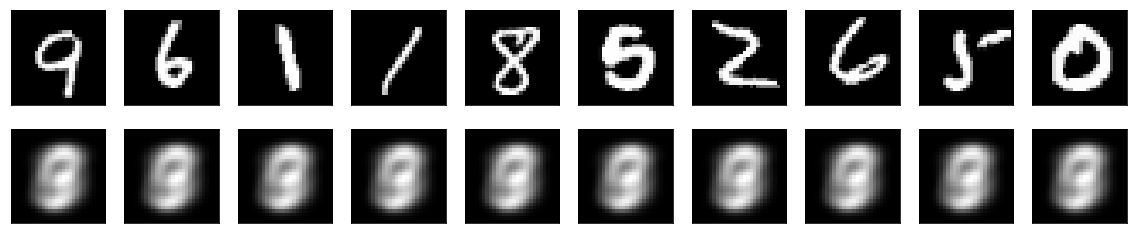

Autoencoder de 784x8


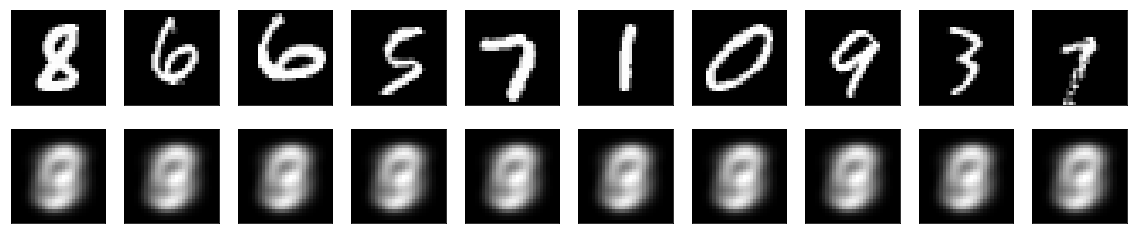

Autoencoder de 784x32


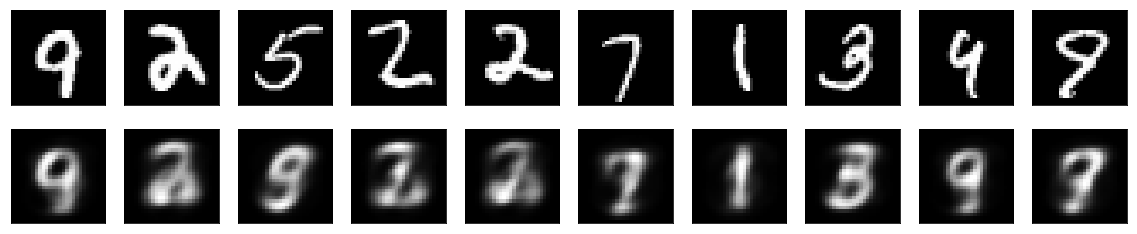

Autoencoder de 784x64


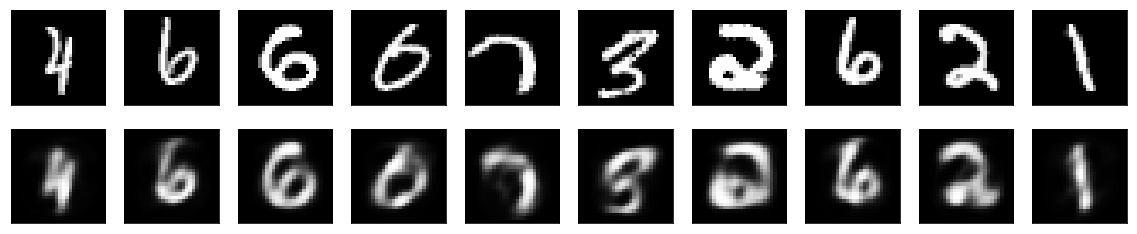

In [20]:
x_test=X_test
plot_autoencoder('784x2')
plot_autoencoder('784x8')
plot_autoencoder('784x32')
plot_autoencoder('784x64')

> Es facil apreciar, que el autoencoder logra una mejor reconstrucción a mayor cantidad de nodos en la capa inicia, en contra del tiempo de entrenamiento.

##### Pregunta 2.1.c.

In [43]:
def getKNN(name,d, noisy=None):
    global X_train
    print("Clasificador KNN para "+name+" dimensiones:")
    pca = PCA(n_components=d)
    if noisy is not None:
        X_train=noisy
        #X_test=noisy
    pca.fit(X_train)
    pca_train = pca.transform(X_train)
    pca_test = pca.transform(X_test)
    ...#AUTOENCODER
    autoencoder = load_model('models/autoencoder_'+name+'.h5')
    encoder=load_model('models/encoder_'+name+'.h5')
    decoder=load_model('models/decoder_'+name+'.h5')
    encoded_train = encoder.predict(X_train)
    encoded_test = encoder.predict(X_test)
    ...#CLASIFICATION
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    print("-> Classification Accuracy PCA %.2f" % clf.score(pca_test,y_test))
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print("-> Classification Accuracy %.2f" % clf.score(encoded_test,y_test))

In [44]:
load_data()
getKNN('784x2',2)
getKNN('784x4',4)
getKNN('784x8',8)
getKNN('784x16',16)
getKNN('784x32',32)

Clasificador KNN para 784x2 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.44
-> Classification Accuracy 0.17
Clasificador KNN para 784x4 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.65
-> Classification Accuracy 0.25
Clasificador KNN para 784x8 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.90
-> Classification Accuracy 0.45
Clasificador KNN para 784x16 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.96
-> Classification Accuracy 0.43
Clasificador KNN para 784x32 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.97
-> Classification Accuracy 0.86


> Nuevamente, en los indicadores mostrados, es posible encontrar una mejora en la generalización, sobre todo si consideramos la matriz con 64 nodos. A pesar de que no es visible en estas lineas, el tiempo de ejecución nuevamente es mayor con esa configuración (x64).

##### Pregunta 2.1.d.

In [49]:
def autoencoder_21d(name, d, verbose=True):
    print('Autoencoder Deep de '+name)
    target_dim = d #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(target_dim, activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(encoded3)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(inputs=input_img, outputs=decoded1)
    encoder = Model(inputs=input_img, outputs=encoded3)
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(X_train,X_train,epochs=40,batch_size=32,validation_data=(X_val,X_val))
    autoencoder.save('models/autoencoder_'+name+'.h5', overwrite=True)
    encoder.save('models/encoder_'+name+'.h5', overwrite=True)
    #decoder.save('models/decoder_'+name+'.h5', overwrite=True)    
    pca = PCA(n_components=target_dim)
    pca.fit(X_train)
    return(pca)

In [50]:
autoencoder_21d('768x1000x500x250x2',2)

Autoencoder Deep de 768x1000x500x250x2
Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 5s 100us/step - loss: 0.1848 - val_loss: 0.1301
Epoch 2/40
55000/55000 [==============================] - 5s 91us/step - loss: 0.1142 - val_loss: 0.1062
Epoch 3/40
55000/55000 [==============================] - 5s 98us/step - loss: 0.0982 - val_loss: 0.0925
Epoch 4/40
55000/55000 [==============================] - 6s 102us/step - loss: 0.0908 - val_loss: 0.0879
Epoch 5/40
55000/55000 [==============================] - 6s 114us/step - loss: 0.0865 - val_loss: 0.0844
Epoch 6/40
55000/55000 [==============================] - 7s 118us/step - loss: 0.0835 - val_loss: 0.0854
Epoch 7/40
55000/55000 [==============================] - 5s 88us/step - loss: 0.0815 - val_loss: 0.0810
Epoch 8/40
55000/55000 [==============================] - 5s 89us/step - loss: 0.0799 - val_loss: 0.0790
Epoch 9/40
55000/55000 [==============================] - 5s 86us/st

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
autoencoder_21d('768x1000x500x250x4',4)
autoencoder_21d('768x1000x500x250x8',8)
pca=autoencoder_21d('768x1000x500x250x16',16)

Autoencoder Deep de 768x1000x500x250x4
Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 8s 149us/step - loss: 0.1863 - val_loss: 0.1292
Epoch 2/40
55000/55000 [==============================] - 5s 97us/step - loss: 0.1146 - val_loss: 0.1024
Epoch 3/40
55000/55000 [==============================] - 8s 142us/step - loss: 0.0985 - val_loss: 0.0933
Epoch 4/40
55000/55000 [==============================] - 5s 99us/step - loss: 0.0910 - val_loss: 0.0904
Epoch 5/40
55000/55000 [==============================] - 6s 113us/step - loss: 0.0865 - val_loss: 0.0850
Epoch 6/40
55000/55000 [==============================] - 6s 101us/step - loss: 0.0835 - val_loss: 0.0825
Epoch 7/40
55000/55000 [==============================] - 7s 131us/step - loss: 0.0813 - val_loss: 0.0815
Epoch 8/40
55000/55000 [==============================] - 7s 125us/step - loss: 0.0798 - val_loss: 0.0817
Epoch 9/40
55000/55000 [==============================] - 9s 160us

In [52]:
getKNN('768x1000x500x250x2',2)
getKNN('768x1000x500x250x4',4)
getKNN('768x1000x500x250x8',8)
getKNN('768x1000x500x250x16',16)

Clasificador KNN para 768x1000x500x250x2 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.44


KeyboardInterrupt: 

> Se logro una mejora significativa con el uso de esta técnica, sin embargo el tiempo de procesamiento de la medición por KNN no fue viable, suponemos que por la gran cantidad de parámetros de la red.

##### Pregunta 2.1.e.

In [53]:
def plot_TSNE(name, pca):
    nplot=5000 #warning: mind your memory!

    encoder16d=load_model('models/encoder_'+name+'.h5')
    encoder2d=load_model('models/encoder_'+name+'.h5')

    encoded_train = encoder16d.predict(X_train[:nplot])
    model = TSNE(n_components=2, random_state=0)
    encoded_train = model.fit_transform(encoded_train)
    plt.figure(figsize=(10, 10))
    colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
    markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
    for idx in range(0,nplot):
        label = y_train[idx]
        line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
            color=colors[label], marker=markers[label], markersize=6)
    pca_train = pca.transform(X_train)
    encoded_train = pca_train[:nplot]
    ... #plot PCA
    ... #plot AE (d=2) without TSNE
    encoded_train = encoder2d.predict(X_train[:nplot]) #Autoencoder with d=2
    plt.figure(figsize=(10, 10))
    colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
    markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
    for idx in range(0,nplot):
        label = y_train[idx]
        line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
            color=colors[label], marker=markers[label], markersize=6)

/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


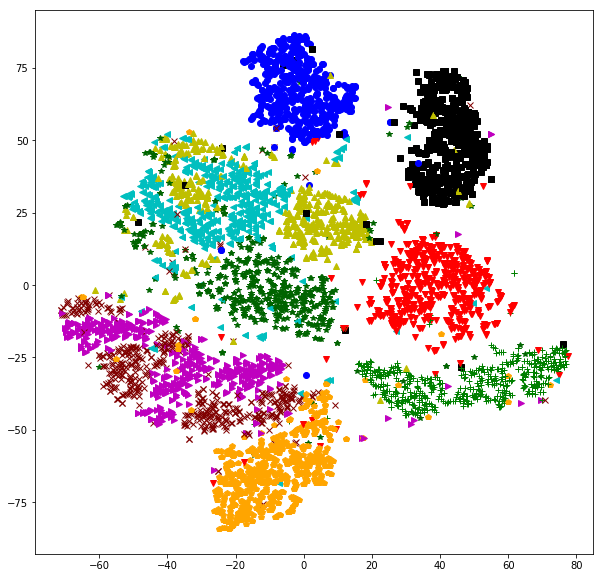

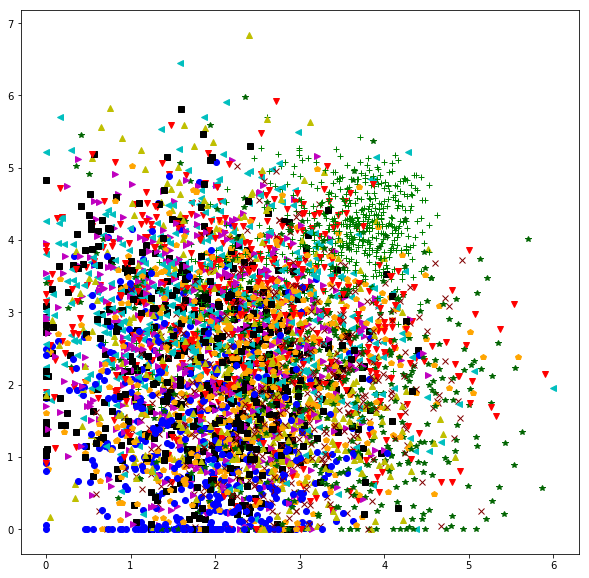

In [54]:
plot_TSNE('768x1000x500x250x16', pca)

> Claramente el uso de PCA mejora la capacidad de clasificación del modelo.

##### Pregunta 2.1.f.

In [55]:
x_train = np.reshape(X_train, (len(X_train), 28, 28, 1)) #modify for th dim ordering
x_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
x_val = np.reshape(X_val, (len(X_val), 28, 28, 1))
input_img = Input(shape=(28, 28, 1))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
autoencoder.fit(x_train,x_train,verbose=True,epochs=50,batch_size=32,validation_data=(x_val,x_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 16)        0         
__________

> Consideramos que le nivel de respuesta del uso directo de las imagenes de MINST fue mucho mejor, sin embargo, sacrificamos tiempo de entrenamiento. Claramente debido al uso de matrices de entrada (entrada no vectorizada).

### 2.2 Denoising.

##### Pregunta 2.2.a.

In [56]:
def get_noise_data():
    global noisy_x_train, noisy_x_val, noisy_x_test
    load_data()
    noise_level = 0.1
    noise_mask = binomial(n=1,p=noise_level,size=X_train.shape)
    noisy_x_train = X_train*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=X_val.shape)
    noisy_x_val = X_val*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=X_test.shape)
    noisy_x_test = X_test*noise_mask

> Tal como en el resto del ejercicio, se encapsulo en una función el generador, para se ser usado cada vez sea necesario.

##### Pregunta 2.2.b.

In [57]:
def autoencoder_22b(name, d, verbose=True):
    print('Autoencoder con '+str(d)+' dimensiones')
    get_noise_data()
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(noisy_x_train, X_train, epochs=40, batch_size=32, validation_data=(noisy_x_val, X_val))
    autoencoder.save('models/autoencoder_'+name+'.h5', overwrite=True)
    encoder.save('models/encoder_'+name+'.h5', overwrite=True)
    decoder.save('models/decoder_'+name+'.h5', overwrite=True)

In [58]:
autoencoder_22b('noise_encoder_768x64',64)

Autoencoder con 64 dimensiones
Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 3s 55us/step - loss: 0.3062 - val_loss: 0.2670
Epoch 2/40
55000/55000 [==============================] - 3s 61us/step - loss: 0.2659 - val_loss: 0.2641
Epoch 3/40
55000/55000 [==============================] - 3s 56us/step - loss: 0.2643 - val_loss: 0.2632
Epoch 4/40
55000/55000 [==============================] - 3s 56us/step - loss: 0.2636 - val_loss: 0.2627
Epoch 5/40
55000/55000 [==============================] - 3s 49us/step - loss: 0.2632 - val_loss: 0.2623
Epoch 6/40
55000/55000 [==============================] - 4s 73us/step - loss: 0.2628 - val_loss: 0.2619
Epoch 7/40
55000/55000 [==============================] - 3s 50us/step - loss: 0.2624 - val_loss: 0.2615
Epoch 8/40
55000/55000 [==============================] - 3s 48us/step - loss: 0.2620 - val_loss: 0.2611
Epoch 9/40
55000/55000 [==============================] - 4s 74us/step - loss: 0

Autoencoder de noise_encoder_768x64


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


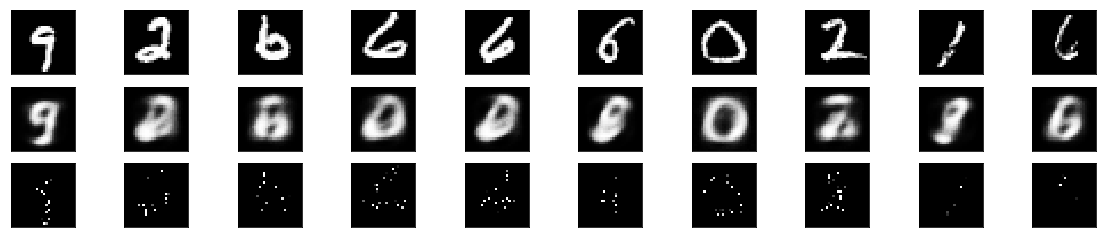

In [59]:
plot_autoencoder('noise_encoder_768x64', noisy_x_test)

> El grafico anterior muestra la relación entre el valor original, la predicción, y la imagen modificada. Sin duda el algoritmo es capaz de tener una apreciable predicción, aún cuando la imagen de entrada es muy precaria.

##### Pregunta 2.2.c.

In [60]:
getKNN('noise_encoder_768x64',64, noisy_x_train)

Clasificador KNN para noise_encoder_768x64 dimensiones:


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


-> Classification Accuracy PCA 0.72
-> Classification Accuracy 0.63


> El desempeño se vio claramente mermado dada la calidad de las imagenes de entrada.

##### Pregunta 2.2.d.

In [63]:
def get_noise_data2():
    global X_train, y_train, X_val, y_val, X_test, y_test
    global noisy_x_train, noisy_x_val, noisy_x_test
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    X_train = x_train.astype('float32') / 255.#and x_test
    X_test = x_test.astype('float32') / 255.
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(5000/60000), random_state=42)
    noise = np.random.normal(loc=0.5, scale=0.2, size=X_train.shape)
    noisy_x_train = X_train + noise
    noisy_x_train = np.clip(noisy_x_train, 0., 1.)
    noise = np.random.normal(loc=0.5, scale=0.5, size=X_val.shape)
    noisy_x_val = X_val + noise
    noisy_x_val = np.clip(noisy_x_val, 0., 1.)
    noisy_x_test=x_test
    noisy_x_train = noisy_x_train.reshape(len(noisy_x_train),28*28)
    noisy_x_test = noisy_x_test.reshape(len(noisy_x_test),28*28)
    noisy_x_val = noisy_x_val.reshape(len(noisy_x_val),28*28)


> La funcion anterior produce sobre la imagen ruido gaussiano.

In [64]:
get_noise_data2()

In [65]:
autoencoder_22b('noise_encoder_random_768x64',64)

Autoencoder con 64 dimensiones
Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 3s 56us/step - loss: 0.3061 - val_loss: 0.2671
Epoch 2/40
55000/55000 [==============================] - 4s 71us/step - loss: 0.2659 - val_loss: 0.2641
Epoch 3/40
55000/55000 [==============================] - 3s 57us/step - loss: 0.2643 - val_loss: 0.2631
Epoch 4/40
55000/55000 [==============================] - 4s 79us/step - loss: 0.2636 - val_loss: 0.2626
Epoch 5/40
55000/55000 [==============================] - 3s 50us/step - loss: 0.2631 - val_loss: 0.2622
Epoch 6/40
55000/55000 [==============================] - 4s 77us/step - loss: 0.2627 - val_loss: 0.2618
Epoch 7/40
55000/55000 [==============================] - 4s 67us/step - loss: 0.2623 - val_loss: 0.2615
Epoch 8/40
55000/55000 [==============================] - 4s 75us/step - loss: 0.2619 - val_loss: 0.2610
Epoch 9/40
55000/55000 [==============================] - 3s 51us/step - loss: 0

Autoencoder de noise_encoder_random_768x64


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


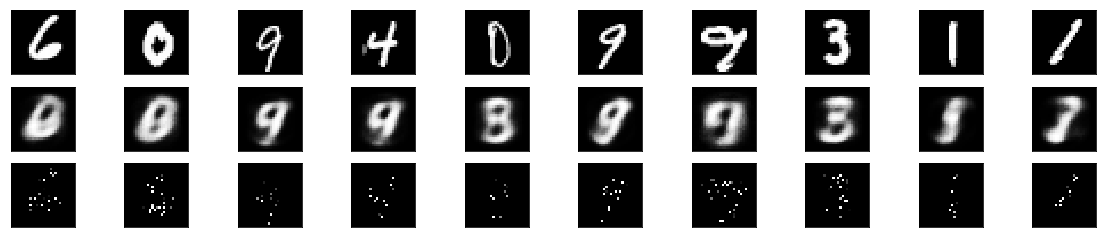

In [66]:
plot_autoencoder('noise_encoder_random_768x64', noisy_x_test)

> Nuevamente la red, consideramos, es capaz de generalizar, aunque esta vez de manera mas pobre, con la poca información que tiene.

### 2.3 Similarity reconstruct

##### Pregunta 2.3.a.

In [67]:
load_data()
def similarity_data(X,Y,sim=10):
    index_classes = [ np.where(Y==number)[0] for number in range(10)]
    new_X = np.zeros((1,X.shape[1]))
    simi_X = np.zeros((1,X.shape[1]))
    for x,y in zip(X,Y):
        similarities = index_classes[y]
        sample_sim = np.random.choice(similarities,sim)
        new_X = np.concatenate((new_X, np.tile(x,(sim,1))),axis=0)
        simi_X = np.concatenate((simi_X, X[sample_sim]),axis=0)
    return new_X[1:],simi_X[1:]
data, data_sim = similarity_data(X_train[:2000],y_train[:2000])

In [68]:
def plot_similarity(data, data_sim, name=None):
    print('Autoencoder de Similarity')
    plt.figure(figsize=(20, 4))
    n=10
    m=2
    if name is not None:
        m=3
        autoencoder = load_model('models/autoencoder_'+name+'.h5')
        encoder=load_model('models/encoder_'+name+'.h5')
        decoder=load_model('models/decoder_'+name+'.h5')
        encoded_test = encoder.predict(data)
        decoded_test = decoder.predict(encoded_test)

    for i in range(n):
        j = np.random.randint(0,2000)
        
        ax = plt.subplot(m, n, i + 1)
        plt.imshow(data[j].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
              
        ax = plt.subplot(m, n, i + 1 + n)
        plt.imshow(data_sim[j].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        if name is not None:
            
            ax = plt.subplot(m, n, i + 1 + 2*n)
            plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
        
    plt.show()
    


Autoencoder de Similarity


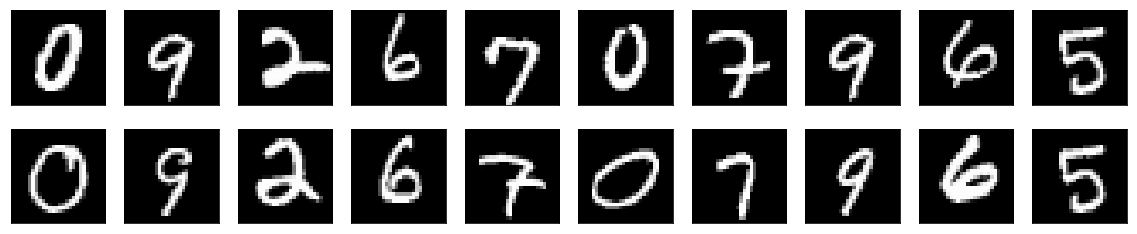

In [69]:
plot_similarity(data, data_sim)

> La función de similarity_data, es una herramienta que ofrece una excelente alternativa para robustecer la red, en la grafica anterior, donde se aprecian los elementos "data" vs los elementos "similares", es posible visualizar que el algoritmo cumple con el objetivo.

##### Pregunta 2.3.b.

In [72]:
def autoencoder_23b(name, d, verbose=True):
    print('Autoencoder con '+str(d)+' dimensiones')
    load_data()
    similarity_data(X_train[:2000],y_train[:2000])
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    history=autoencoder.fit(data,data_sim,epochs=50,batch_size=32,validation_split=0.2)
    autoencoder.save('models/autoencoder_'+name+'.h5', overwrite=True)
    encoder.save('models/encoder_'+name+'.h5', overwrite=True)
    decoder.save('models/decoder_'+name+'.h5', overwrite=True)
    pca = PCA(n_components=d)
    pca.fit(X_train)
    return data, data_sim, history, pca


In [73]:
data, data_sim, history, pca = autoencoder_23b('Similarity x64', 64)

Autoencoder con 64 dimensiones
Train on 16000 samples, validate on 4000 samples
Epoch 1/50
16000/16000 [==============================] - 1s 86us/step - loss: 0.3398 - val_loss: 0.2713
Epoch 2/50
16000/16000 [==============================] - 2s 137us/step - loss: 0.2686 - val_loss: 0.2645
Epoch 3/50
16000/16000 [==============================] - 1s 68us/step - loss: 0.2650 - val_loss: 0.2625
Epoch 4/50
16000/16000 [==============================] - 1s 91us/step - loss: 0.2636 - val_loss: 0.2616
Epoch 5/50
16000/16000 [==============================] - 2s 123us/step - loss: 0.2630 - val_loss: 0.2611
Epoch 6/50
16000/16000 [==============================] - 2s 115us/step - loss: 0.2625 - val_loss: 0.2607
Epoch 7/50
16000/16000 [==============================] - 2s 119us/step - loss: 0.2623 - val_loss: 0.2605
Epoch 8/50
16000/16000 [==============================] - 1s 92us/step - loss: 0.2621 - val_loss: 0.2603
Epoch 9/50
16000/16000 [==============================] - 1s 70us/step - los

> No vemos una degradación en la capacidad de la red, por el contrario creemos que esta mejora, al aumentar la capacidad de generalización.

##### Pregunta 2.3.c.

Autoencoder de Similarity


/home/rohermosilla/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


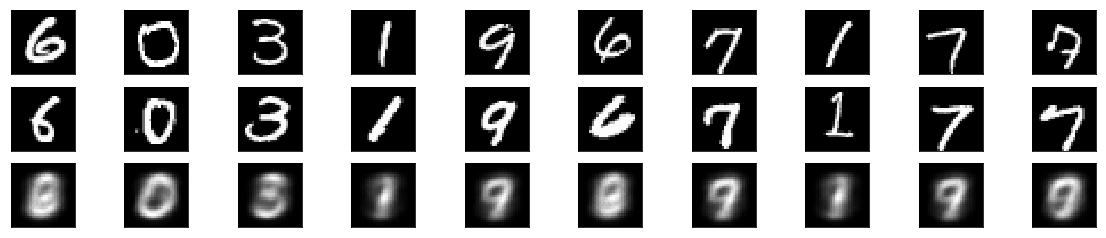

In [74]:
plot_similarity(data, data_sim, 'Similarity x64')

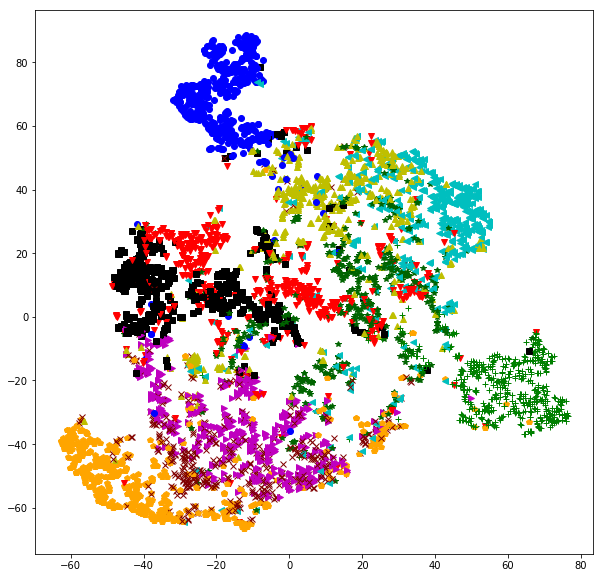

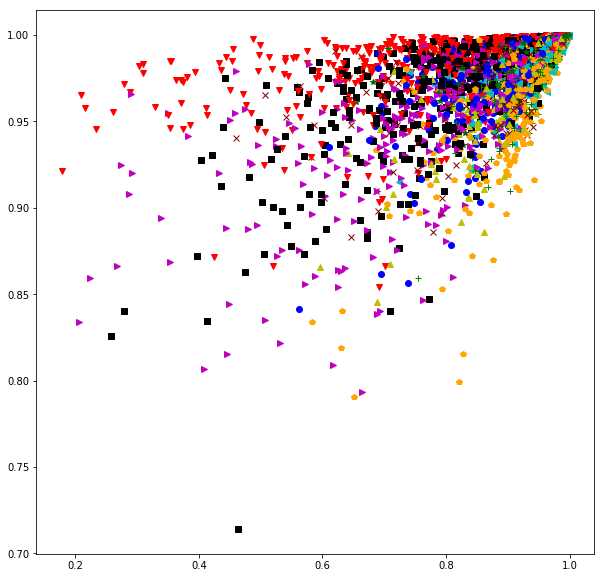

In [75]:
plot_TSNE('Similarity x64', pca)

> Tal como se mencionó en la pregunta anterior, donde creiamos haber logrado una mejor generalización, si hay algunas "confusiones", lo que implica que la red no ha mejorado.

### 2.4 Pre-training

##### Pregunta 2.4.a.

In [6]:
load_data()
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_val = to_categorical(y_val, 10)
model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()
optimizer_ = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train,epochs=50, batch_size=25,shuffle=True, validation_data=(X_val, Y_val))
model.save('models/ReluNet-768x1000x1000x10-NFT-50epochs.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s 115us/step - loss: 0.7503 - acc: 0.7600 - val_loss: 0.3774 - val_acc: 0.8850
Epoch 2/50
55000/55000 [==============================] - 4s 72us/step - loss: 0.3538 - acc: 0.8955 - val_loss: 0.3409 - val_acc: 0.8956
Epoch 3/50
55000/55000 [==============================] - 4s 73us/step -

> Aun cuando consideramos que esta red tiene un peor desempeño, lamentamos no haber concluido las pruebas de error de clasificación requeridas en el ejercicio por falta de tiempo.

##### Pregunta 2.4.b.

In [14]:
load_data()
... ## Load and preprocess MNIST as usual
...###AUTOENCODER 1
n_hidden_layer1=1000
activation_layer1='relu'
decoder_activation_1='softmax'
epochs_=5
loss_='categorical_crossentropy'
x_train=X_train
x_val=X_val
batch_size_=25
input_img1 = Input(shape=(784,))
encoded1 = Dense(n_hidden_layer1,activation=activation_layer1)(input_img1)
decoded1 = Dense(784, activation=decoder_activation_1)(encoded1)
autoencoder1 = Model(inputs=input_img1, outputs=decoded1)
encoder1 = Model(inputs=input_img1, outputs=encoded1)
autoencoder1.compile(optimizer=optimizer_, loss=loss_)
autoencoder1.fit(x_train, x_train, epochs=epochs_, batch_size=batch_size_,shuffle=True, validation_data=(x_val, x_val))
encoded_input1 = Input(shape=(n_hidden_layer1,))
autoencoder1.save('models/autoencoder_layer1.h5')
encoder1.save('models/encoder_layer1.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 69us/step - loss: 519.8823 - val_loss: 510.7763
Epoch 2/5
55000/55000 [==============================] - 4s 68us/step - loss: 510.8556 - val_loss: 507.6093
Epoch 3/5
55000/55000 [==============================] - 3s 63us/step - loss: 508.6054 - val_loss: 506.0545
Epoch 4/5
55000/55000 [==============================] - 4s 67us/step - loss: 507.4671 - val_loss: 505.2297
Epoch 5/5
55000/55000 [==============================] - 4s 71us/step - loss: 506.7755 - val_loss: 504.6246


In [24]:
...###AUTOENCODER 2
load_data()
x_train=X_train
x_val=X_val
x_test=X_test
n_hidden_layer2=1000
activation_layer2='relu'
decoder_activation_2='softmax'
x_train_encoded1 = encoder1.predict(x_train) #FORWARD PASS DATA THROUGH FIRST ENCODER
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)
input_img2 = Input(shape=(n_hidden_layer1,))
encoded2 = Dense(n_hidden_layer2, activation=activation_layer2)(input_img2)
decoded2 = Dense(n_hidden_layer2, activation=decoder_activation_2)(encoded2)
autoencoder2 = Model(inputs=input_img2, outputs=decoded2)
encoder2 = Model(inputs=input_img2, outputs=encoded2)
autoencoder2.compile(optimizer=optimizer_, loss=loss_)
autoencoder2.fit(x_train_encoded1,x_train_encoded1,epochs=epochs_,batch_size=batch_size_,shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
encoded_input2 = Input(shape=(n_hidden_layer2,))
autoencoder2.save('models/autoencoder_layer2.h5')
encoder2.save('models/encoder_layer2.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 74us/step - loss: 1269.9710 - val_loss: 1253.2222
Epoch 2/5
55000/55000 [==============================] - 4s 79us/step - loss: 1250.1078 - val_loss: 1246.9590
Epoch 3/5
55000/55000 [==============================] - 5s 92us/step - loss: 1245.1595 - val_loss: 1244.6298
Epoch 4/5
55000/55000 [==============================] - 5s 84us/step - loss: 1242.8698 - val_loss: 1243.0281
Epoch 5/5
55000/55000 [==============================] - 5s 83us/step - loss: 1241.6930 - val_loss: 1242.4310


In [28]:
...#FINE TUNNING
model = Sequential()
model.add(Dense(n_hidden_layer1, activation=activation_layer1, input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(n_hidden_layer2, activation=activation_layer2))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=optimizer_,loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, Y_train,epochs=epochs_, batch_size=batch_size_,
shuffle=True, validation_data=(x_val, Y_val))
model.save('models/Net-768x1000x1000x10-finetunned.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_39 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_40 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 5s 82us/step - loss: 0.0552 - acc: 0.9813 - val_loss: 0.0298 - val_acc: 0.9905
Epoch 2/5
55000/55000 [==============================] - 4s 81us/step - loss: 0.0243 - acc: 0.9921 - val_loss: 0.0206 - val_acc: 0.9934
Epoch 3/5
55000/55000 [==============================] - 5s 88us/step - los

> Con la información disponible, podemos decir que antes del fine-tunning el nivel de error es considerable. Sin embargo despues del fine-tunning el error decae hasta lograr valores equivalentes al experimento anterior.

##### Pregunta 2.4.c.

In [29]:
load_data()
... ## Load and preprocess MNIST as usual
...###AUTOENCODER 1
n_hidden_layer1=1000
activation_layer1='tanh'
decoder_activation_1='softmax'
epochs_=5
loss_='categorical_crossentropy'
x_train=X_train
x_val=X_val
batch_size_=25
input_img1 = Input(shape=(784,))
encoded1 = Dense(n_hidden_layer1,activation=activation_layer1)(input_img1)
decoded1 = Dense(784, activation=decoder_activation_1)(encoded1)
autoencoder1 = Model(inputs=input_img1, outputs=decoded1)
encoder1 = Model(inputs=input_img1, outputs=encoded1)
autoencoder1.compile(optimizer=optimizer_, loss=loss_)
autoencoder1.fit(x_train, x_train, epochs=epochs_, batch_size=batch_size_,shuffle=True, validation_data=(x_val, x_val))
encoded_input1 = Input(shape=(n_hidden_layer1,))
autoencoder1.save('models/autoencoder_layer1.h5')
encoder1.save('models/encoder_layer1.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 73us/step - loss: 1513.4612 - val_loss: 1623.1136
Epoch 2/5
55000/55000 [==============================] - 5s 98us/step - loss: 1626.2756 - val_loss: 1619.2658
Epoch 3/5
55000/55000 [==============================] - 4s 67us/step - loss: 1625.6763 - val_loss: 1620.0694
Epoch 4/5
55000/55000 [==============================] - 4s 76us/step - loss: 1625.2699 - val_loss: 1619.2932
Epoch 5/5
55000/55000 [==============================] - 4s 70us/step - loss: 1625.1089 - val_loss: 1620.1511


In [30]:
...###AUTOENCODER 2
load_data()
x_train=X_train
x_val=X_val
x_test=X_test
n_hidden_layer2=1000
activation_layer2='tanh'
decoder_activation_2='softmax'
x_train_encoded1 = encoder1.predict(x_train) #FORWARD PASS DATA THROUGH FIRST ENCODER
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)
input_img2 = Input(shape=(n_hidden_layer1,))
encoded2 = Dense(n_hidden_layer2, activation=activation_layer2)(input_img2)
decoded2 = Dense(n_hidden_layer2, activation=decoder_activation_2)(encoded2)
autoencoder2 = Model(inputs=input_img2, outputs=decoded2)
encoder2 = Model(inputs=input_img2, outputs=encoded2)
autoencoder2.compile(optimizer=optimizer_, loss=loss_)
autoencoder2.fit(x_train_encoded1,x_train_encoded1,epochs=epochs_,batch_size=batch_size_,shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
encoded_input2 = Input(shape=(n_hidden_layer2,))
autoencoder2.save('models/autoencoder_layer2.h5')
encoder2.save('models/encoder_layer2.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 4s 75us/step - loss: 270.7751 - val_loss: 275.0104
Epoch 2/5
55000/55000 [==============================] - 4s 74us/step - loss: 276.3327 - val_loss: 275.0104
Epoch 3/5
55000/55000 [==============================] - 4s 78us/step - loss: 276.3327 - val_loss: 275.0104
Epoch 4/5
55000/55000 [==============================] - 4s 77us/step - loss: 276.3327 - val_loss: 275.0104
Epoch 5/5
55000/55000 [==============================] - 4s 80us/step - loss: 276.3327 - val_loss: 275.0104


In [31]:
...#FINE TUNNING
model = Sequential()
model.add(Dense(n_hidden_layer1, activation=activation_layer1, input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(n_hidden_layer2, activation=activation_layer2))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=optimizer_,loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, Y_train,epochs=epochs_, batch_size=batch_size_,
shuffle=True, validation_data=(x_val, Y_val))
model.save('models/Net-768x1000x1000x10-finetunned.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_46 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_47 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 5s 88us/step - loss: 0.3192 - acc: 0.9001 - val_loss: 0.2739 - val_acc: 0.9087
Epoch 2/5
55000/55000 [==============================] - 5s 83us/step - loss: 0.1915 - acc: 0.9245 - val_loss: 0.1381 - val_acc: 0.9485
Epoch 3/5
55000/55000 [==============================] - 5s 85us/step - los

> Creemos que la red se comporta de peor forma utilizando la tanh, la razón a nuestro juicio, es que probablemente los valores de salida de la tanh esten generando anulaciones que afectan el resultado.